# Objetivos deste trabalho:
- Se familiarizar com o ambiente Notebook e com Python
- Implementar um perceptron simples, treiná-lo no conjunto de TREINO do CIFAR-10 e avaliá-lo no conjunto de TESTE (alvo: distinguir fotos de animais de meios de transporte)
- Utilizar a função sigmóide e verificar seu efeito no treinamento e na avaliação
- Modificar a metodologia para classificar cada classe individualmente (i.e. treinar 10 perceptrons, um para cada classe). Considerar: dado um exemplo, que passará por cada perceptron, como decidir qual é a classe dele?

In [1]:
%matplotlib inline

import torch
import torchvision
import numpy as np

np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# Carregar os datasets

dataset_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True)

dataset_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
print(len(dataset_train), len(dataset_test))

50000 10000


In [5]:
# Converter para tons de cinza

# Treino
grayscale_dataset_train = []
for img,label in dataset_train:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_train.append((gray_npimg,category))
    
# Teste
grayscale_dataset_test = []
for img,label in dataset_test:
    category = classes[label]
    gray_npimg = np.array(img.convert('L'))
    grayscale_dataset_test.append((gray_npimg,category))    

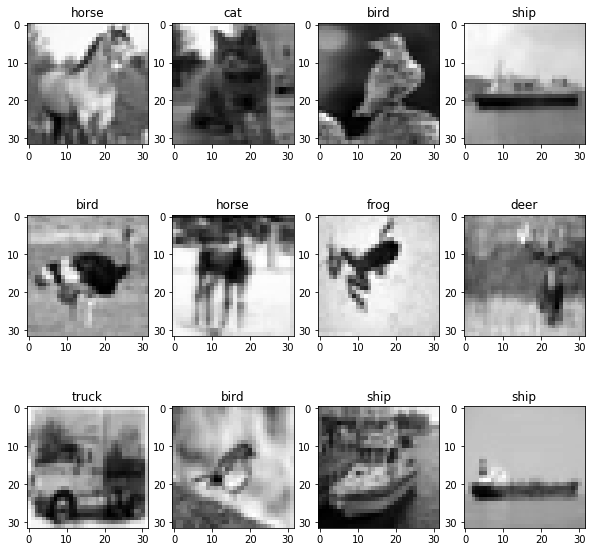

In [17]:
# Mostrar imagens

import matplotlib.pyplot as plt
import random

fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 3
for i in range(1, columns*rows +1):
    image_index = random.randint(0, len(dataset_train))
    label = grayscale_dataset_train[image_index][1]
    npimg = grayscale_dataset_train[image_index][0]

    fig.add_subplot(rows, columns, i)
    
    plt.imshow(npimg, cmap='gray')
    plt.title(label)
    
plt.show()

In [7]:
# Converter para vetores 1D

# Para pensar: por que a divisão por 255 no código abaixo?

linear_dataset_train = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_train:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_train.append((linear_img,label))
    
linear_dataset_test = []
target_labels = ('plane', 'car', 'ship', 'truck')
for img,category in grayscale_dataset_test:
    linear_img = img.reshape(img.shape[0]*img.shape[1],1) / 255
    if category in target_labels:
        label = 1
    else:
        label = 0
    linear_dataset_test.append((linear_img,label))    

In [21]:
size = len(linear_dataset_train[0][0])
print(size)

1024


# Definindo o perceptron

In [22]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def perceptron(inputs, weights):
    # Defina o perceptron aqui
    # print(inputs, weights[:len(weights)-1], weights[len(weights)-1])
    # o = np.dot(inputs, weights[:len(weights)-1]) + weights[len(weights)-1]
    #inputs = np.append(inputs, 1)
    o = np.dot(inputs, weights)
    return sigmoid(o)


# Treinando o perceptron

In [23]:
def evaluate(weights,dataset):
    hits = 0
    for img,label in dataset:
        img = np.append(img, 1)
        # Defina a métrica de avaliação do perceptron aqui (e.g. acurácia)
        y = perceptron(img, weights)
        if(y >= 0.5 and label == 1):
            hits += 1
        
        elif(y < 0.5 and label == 0):
            hits += 1
            
    accuracy = hits / len(dataset)
    return accuracy
        

In [30]:
# Inicialização
weights = (np.random.rand(1,size) - 0.5)[0]
bias = (np.random.rand(1) - 0.5) 
weights = np.append(weights, bias) 

neta = 0.000001  # default = 0.001
np.random.shuffle(linear_dataset_train)
epochs = 30

# Implemente o treino aqui (para separar as duas classes definidas)
accuracies = []
hits = 0

for epoch in range(epochs):
    for image, label in linear_dataset_train:
        image = np.append(image, 1)
        
        y = perceptron(image, weights)
        
        if(y >= 0.5 and label == 1):
            hits += 1
        
        elif(y < 0.5 and label == 0):
            hits += 1

        else:
            delta_weights = neta * (label - y) * image * (1 - image)
            weights += delta_weights
        
    accuracy = hits / len(linear_dataset_train)
    accuracies = np.append(accuracies, accuracy)
    hits = 0
    
    print(epoch, accuracy)
    

0 0.4076
1 0.41654
2 0.44174
3 0.46022
4 0.46748
5 0.46984
6 0.47144
7 0.47182
8 0.472
9 0.47212
10 0.47218
11 0.47178
12 0.47186
13 0.47176
14 0.4716
15 0.4716
16 0.47154
17 0.47166
18 0.4718
19 0.4717
20 0.47162
21 0.47158
22 0.47134
23 0.4713
24 0.47134
25 0.47124
26 0.47116
27 0.47124
28 0.47124
29 0.47134


In [ ]:
# Avalie o modelo treinado aqui
# Como a acurácia no conjunto de teste se compara com a acurácia obtida no conjunto de treino?
#evaluate(weights, linear_dataset_train)


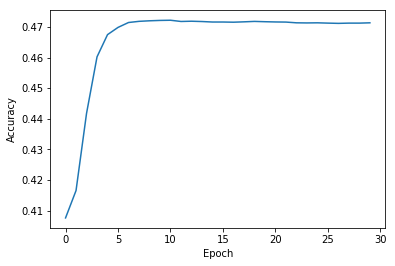

In [31]:
# Caso queiram plotar alguma coisa

import matplotlib.pyplot as plt
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

# Classificando classes individuais

Implemente aqui a modificação do processo de avaliação e treinamento para poder classificar cada classe individualmente.

- Ideia geral: treinar um perceptron por classe (exemplo positivo = exemplos da classe; exemplos negativos = exemplo de todas outras classes)
- Dado um exemplo qualquer, como decidir qual perceptron está dando a classe correta?